# Predição Inicial

#### Alunos: Ellen Shen, Enzo Neto, Gabriel Huerta, Giulia Castro

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

In [2]:
top_2017 = pd.read_csv("top_2017.csv", index_col=0)
top_2018 = pd.read_csv('top_2018.csv', index_col=0)

In [3]:
top_2017.head(3)

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,,,,,,,,,,,,,,,
7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581,0.0,0.0931,0.931,95.977,233713.0,4.0
5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.229,0.0,0.0924,0.813,88.931,228827.0,4.0
4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209,0.0,0.1120,0.846,177.833,228200.0,4.0


In [4]:
top_2018.head(3)

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,,,,,,,,,,,,,,,
6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0


<IPython.core.display.Javascript object>


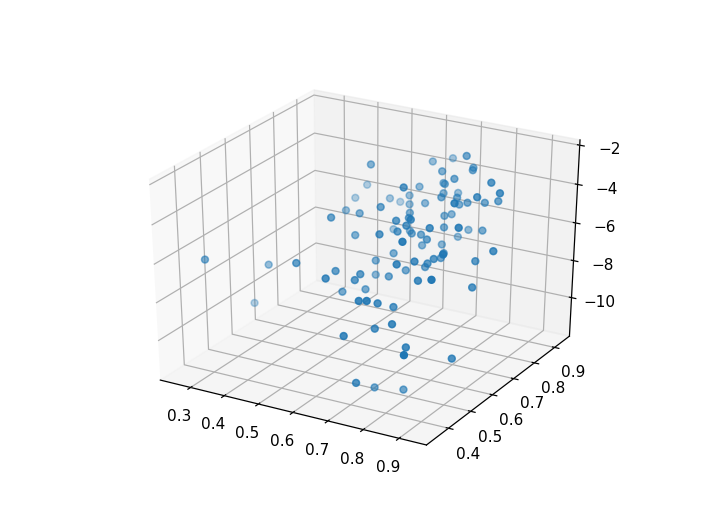

In [27]:
plt3d = plt.figure().gca(projection="3d")
plt3d.scatter(top_2017.danceability, top_2017.energy, top_2017.loudness)

In [18]:
dados_entrada = top_2017.loc[:,("danceability", "energy", "acousticness")]

In [28]:
three_means = cluster.MiniBatchKMeans(n_clusters=3)

In [29]:
three_means.fit(dados_entrada)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=3,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [30]:
saida = three_means.predict(dados_entrada)

In [31]:
saida

array([0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2,
       0, 0, 2, 0, 2, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1, 0, 1, 1, 2, 2, 2,
       2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 0,
       1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 2, 0, 1, 2,
       2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 1], dtype=int32)

In [32]:
conjunto = dados_entrada.copy()

In [33]:
conjunto["saida"] = saida

In [34]:
conjunto.head()

,danceability,energy,acousticness,saida
id,,,,
7qiZfU4dY1lWllzX7mPBI,0.825,0.652,0.5810,0
5CtI0qwDJkDQGwXD1H1cL,0.694,0.815,0.2290,2
4aWmUDTfIPGksMNLV2rQP,0.660,0.786,0.2090,2
6RUKPb4LETWmmr3iAEQkt,0.617,0.635,0.0498,1
3DXncPQOG4VBw3QHh3S81,0.609,0.668,0.0552,1


<IPython.core.display.Javascript object>


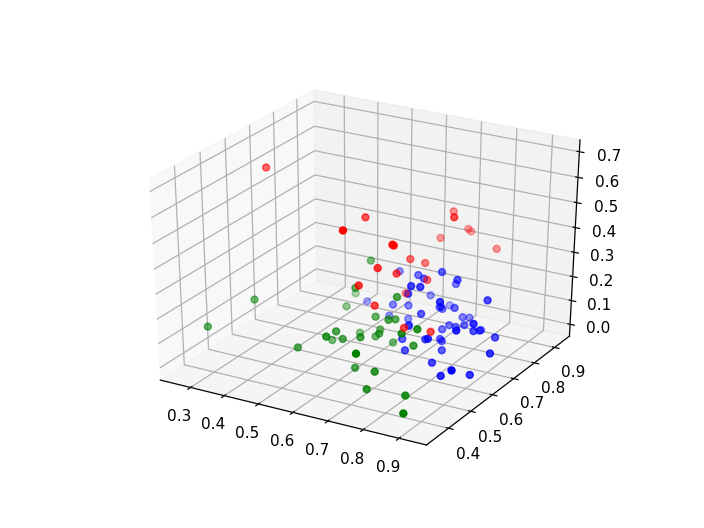

In [35]:
plt3d = plt.figure().gca(projection="3d")
grupo0 = conjunto[conjunto.saida==0]
grupo1 = conjunto[conjunto.saida==1]
grupo2 = conjunto[conjunto.saida==2]

plt3d.scatter(grupo0.danceability, grupo0.energy, grupo0.acousticness, color="r")
plt3d.scatter(grupo1.danceability, grupo1.energy, grupo1.acousticness, color="g")
plt3d.scatter(grupo2.danceability, grupo2.energy, grupo2.acousticness, color="b")